In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import os


from bs4 import BeautifulSoup
from textblob import TextBlob

In [24]:
true = pd.read_csv(r'C:\Users\patri\Downloads\True.csv\True.csv', index_col=False)
fake = pd.read_csv(r'C:\Users\patri\Downloads\Fake.csv\Fake.csv', index_col=False)

In [25]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [26]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [27]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [28]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [29]:
true.isna().sum()

#check for null values

title      0
text       0
subject    0
date       0
dtype: int64

In [30]:
fake.isna().sum()

#check for null values

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
# now concatenate the data , need 
# to mark them by 1 and 0 (true / fake)

In [32]:
true['target'] = 0

#create a new column target with true data
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [33]:
fake['target'] = 1

#create a new column target with fake data
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [34]:
#concatenate the data 

df = [true, fake]

data = pd.concat(df, ignore_index=True)

In [35]:
# words count
def words_count(df):
    length = len(str(df).split())
    return length

# characters count

def char_count(df):
    string = df.split()
    x = ''.join(string)
    return len(x)

# hashtags count

def hashtag_count(df):
    hashtag = len([t for t in df.split() if t.startswith('#')])
    return hashtag

# email count

def email_count(df):
    email = len([t for t in df.split() if t.startswith('@')])
    return email

# digits count

def digits_count(df):
    digits = re.findall(r'[0-9]+', df)
    return digits

In [36]:
def get_features(df):
    df['words_count'] = df['text'].apply(lambda x: words_count(x))
    df['char_count'] = df['text'].apply(lambda x: char_count(x))
    df['hashtags_count'] = df['text'].apply(lambda x: hashtag_count(x))
    df['email_counts'] = df['text'].apply(lambda x: email_count(x))
    df['digits_count'] = df['text'].apply(lambda x: digits_count(x))
    
    return df

In [37]:
data = get_features(data)
data.head()

,title,text,subject,date,target,words_count,char_count,hashtags_count,email_counts,digits_count
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,749,3907,0,0,"[2018, 7, 10, 11, 1, 5, 10, 20, 1, 5, 30, 2018..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,624,3453,0,0,"[1, 21, 1, 8, 1, 1, 2017, 1, 2018]"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,457,2324,0,0,"[2016, 2018]"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,376,2085,0,0,"[2016, 30, 2016]"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,852,4341,0,0,"[2, 2015, 11, 5, 46, 0, 86, 1, 175, 90, 62, 3,..."


Text(0.5, 1.0, 'Counts')

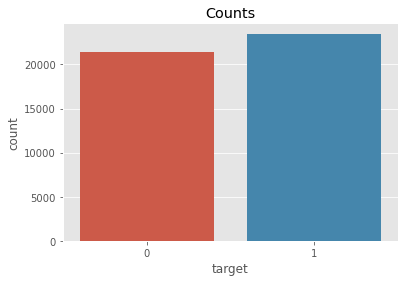

In [38]:
# Value count on sns.countplot
plt.style.use('ggplot')


sns.countplot('target', data=data)
plt.title('Counts')

Text(0.5, 1.0, 'Correlation between number of words and target')

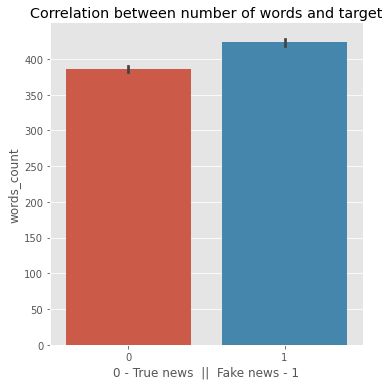

In [39]:
sns.catplot(x='target', y='words_count', kind='bar', data=data)
plt.xlabel('0 - True news  ||  Fake news - 1')
plt.title('Correlation between number of words and target')

In [ ]:
#fake news has more words

Text(0.5, 1.0, 'Correlation between hashtags and target')

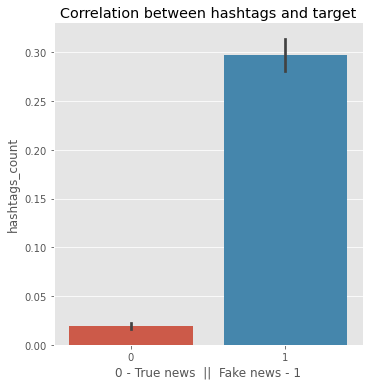

In [40]:
sns.catplot(x='target', y='hashtags_count', kind='bar', data=data)
plt.xlabel('0 - True news  ||  Fake news - 1')
plt.title('Correlation between hashtags and target')

Text(0.5, 1.0, 'Correlation between email and target')

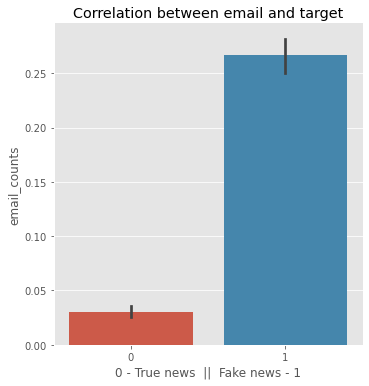

In [41]:
sns.catplot(x='target', y='email_counts', kind='bar', data=data)
plt.xlabel('0 - True news  ||  Fake news - 1')
plt.title('Correlation between email and target')

Text(0.5, 6.79999999999999, '0 - True news  ||  Fake news - 1')

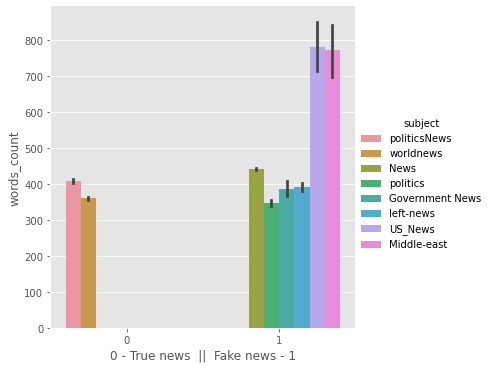

In [42]:
sns.catplot(x='target', y='words_count', kind='bar', data=data, hue='subject')
plt.xlabel('0 - True news  ||  Fake news - 1')